In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F


dropout_value = 0.1

def conv_bn_act(in_ch, out_ch, kernel=3, stride=1, padding=1, dilation=1, dropout_p=0.05):
    return nn.Sequential(
        nn.Conv2d(in_ch, out_ch, kernel_size=kernel, stride=stride,
                  padding=padding, dilation=dilation, bias=False),
        nn.BatchNorm2d(out_ch),
        nn.ReLU(inplace=True),
        nn.Dropout(dropout_p)
    )

def dws_bn_act(in_ch, out_ch, kernel_size=3, stride=1, padding=1, dilation=1,dropout_p=0.05):
    return nn.Sequential(
        nn.Conv2d(in_ch, in_ch, kernel_size=kernel_size, stride=stride,
                            padding=padding, dilation=dilation, groups=in_ch, bias=False),
        nn.Conv2d(in_ch, out_ch, kernel_size=1, stride=1, padding=0, bias=False),
        nn.BatchNorm2d(out_ch),
        nn.ReLU(inplace=True),
        nn.Dropout(dropout_p)
    )

class Model1(nn.Module):
    def __init__(self, num_classes):
        super(Model1, self).__init__()

        # CONVOLUTION BLOCK 1
        self.c1_1 = conv_bn_act(3, 32, kernel=3, stride=1, padding=1, dilation=1)
        self.c1_2 = conv_bn_act(32, 64, kernel=3, stride=2, padding=1, dilation=1)
        self.onexonec1_1 = conv_bn_act(64, 32, kernel=1, stride=1, padding=0, dilation=1)

        # CONVOLUTION BLOCK 2
        self.c2_1 = conv_bn_act(32, 64, kernel=3, stride=1, padding=1, dilation=1)
        self.c2_2 = dws_bn_act(64, 32, kernel_size=3, stride=2, padding=1, dilation=1)
        #self.onexonec2_1 = conv_bn_act(64, 32, kernel=1, stride=1, padding=0, dilation=1)

        # CONVOLUTION BLOCK 3
        self.c3_1 = conv_bn_act(32, 32, kernel=3, stride=1, padding=1, dilation=1)
        self.c3_2 = conv_bn_act(32, 64, kernel=3, stride=1, padding=1, dilation=1)
        self.onexonec3_1 = conv_bn_act(64, 32, kernel=1, stride=1, padding=0, dilation=1)

        # CONVOLUTION BLOCK 4
        self.c4_1 = conv_bn_act(32, 32, kernel=3, stride=1, padding=1, dilation=1)
        self.c4_2 = conv_bn_act(32, 64, kernel=3, stride=1, padding=1, dilation=1)
        self.c5 = conv_bn_act(64, 64, kernel=3, stride=1, padding=1, dilation=2)

        # OUTPUT BLOCK
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(64, num_classes)


    def forward(self, x):
        # Block 1
        x = self.c1_1(x)
        x = self.c1_2(x)
        x = self.onexonec1_1(x)

        # Block 2
        x = self.c2_1(x)
        x = self.c2_2(x)
        #x = self.onexonec2_1(x)

        # Block 3
        x = self.c3_1(x)
        x = self.c3_2(x)
        x = self.onexonec3_1(x)

        # Block 4 (dilated)
        x = self.c4_1(x)
        x = self.c4_2(x)
        x = self.c5(x)

        # Output Block
        x = self.gap(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        # x = x.view(-1, 10)
        return x

In [38]:
import matplotlib.pyplot as plt


def plot_metrics(train_losses, test_losses, train_acc, test_acc):
    epochs = range(1, len(train_acc) + 1)

    # ----------------------
    # Plot Train Loss
    # ----------------------
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, 'b-', label='Train Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Train Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ----------------------
    # Plot Test Loss
    # ----------------------
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, test_losses, 'r-', label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Test Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ----------------------
    # Plot Train Accuracy
    # ----------------------
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_acc, 'g-', label='Train Accuracy')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy (%)')
    plt.title('Train Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ----------------------
    # Plot Test Accuracy
    # ----------------------
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, test_acc, 'm-', label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Test Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


CUDA Available? True
Using device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 16, 16]          18,432
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
           Dropout-8           [-1, 64, 16, 16]               0
            Conv2d-9           [-1, 32, 16, 16]           2,048
      BatchNorm2d-10           [-1, 32, 16, 16]              64
             ReLU-11           [-1, 32, 16, 16]               0
          Dropout-12           [-1, 32, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          18,432

Epoch=1 Loss=1.9313 Accuracy=21.21: 100%|██████████| 391/391 [00:19<00:00, 20.17it/s]



Test set: Average loss: 0.0148, Accuracy: 3299/10000 (32.99%)

found perfect model!!
Saved best model (acc=32.99%) to best_model.pth

EPOCH: 2


Epoch=2 Loss=1.6745 Accuracy=35.03: 100%|██████████| 391/391 [00:18<00:00, 21.47it/s]



Test set: Average loss: 0.0125, Accuracy: 4251/10000 (42.51%)

found perfect model!!
Saved best model (acc=42.51%) to best_model.pth

EPOCH: 3


Epoch=3 Loss=1.5172 Accuracy=41.19: 100%|██████████| 391/391 [00:19<00:00, 20.21it/s]



Test set: Average loss: 0.0112, Accuracy: 4798/10000 (47.98%)

found perfect model!!
Saved best model (acc=47.98%) to best_model.pth

EPOCH: 4


Epoch=4 Loss=1.5199 Accuracy=45.70: 100%|██████████| 391/391 [00:18<00:00, 21.29it/s]



Test set: Average loss: 0.0103, Accuracy: 5299/10000 (52.99%)

found perfect model!!
Saved best model (acc=52.99%) to best_model.pth

EPOCH: 5


Epoch=5 Loss=1.3707 Accuracy=49.30: 100%|██████████| 391/391 [00:19<00:00, 20.45it/s]



Test set: Average loss: 0.0100, Accuracy: 5369/10000 (53.69%)

found perfect model!!
Saved best model (acc=53.69%) to best_model.pth

EPOCH: 6


Epoch=6 Loss=1.2772 Accuracy=52.12: 100%|██████████| 391/391 [00:18<00:00, 21.60it/s]



Test set: Average loss: 0.0096, Accuracy: 5618/10000 (56.18%)

found perfect model!!
Saved best model (acc=56.18%) to best_model.pth

EPOCH: 7


Epoch=7 Loss=1.3639 Accuracy=55.01: 100%|██████████| 391/391 [00:19<00:00, 20.33it/s]



Test set: Average loss: 0.0084, Accuracy: 6119/10000 (61.19%)

found perfect model!!
Saved best model (acc=61.19%) to best_model.pth

EPOCH: 8


Epoch=8 Loss=1.0935 Accuracy=57.35: 100%|██████████| 391/391 [00:18<00:00, 21.26it/s]



Test set: Average loss: 0.0084, Accuracy: 6170/10000 (61.70%)

found perfect model!!
Saved best model (acc=61.70%) to best_model.pth

EPOCH: 9


Epoch=9 Loss=1.2535 Accuracy=59.83: 100%|██████████| 391/391 [00:19<00:00, 20.03it/s]



Test set: Average loss: 0.0071, Accuracy: 6828/10000 (68.28%)

found perfect model!!
Saved best model (acc=68.28%) to best_model.pth

EPOCH: 10


Epoch=10 Loss=1.1466 Accuracy=61.84: 100%|██████████| 391/391 [00:18<00:00, 20.89it/s]



Test set: Average loss: 0.0076, Accuracy: 6675/10000 (66.75%)


EPOCH: 11


Epoch=11 Loss=1.0191 Accuracy=63.67: 100%|██████████| 391/391 [00:19<00:00, 19.80it/s]



Test set: Average loss: 0.0075, Accuracy: 6700/10000 (67.00%)


EPOCH: 12


Epoch=12 Loss=0.9925 Accuracy=64.92: 100%|██████████| 391/391 [00:18<00:00, 20.99it/s]



Test set: Average loss: 0.0063, Accuracy: 7209/10000 (72.09%)

found perfect model!!
Saved best model (acc=72.09%) to best_model.pth

EPOCH: 13


Epoch=13 Loss=0.9701 Accuracy=66.32: 100%|██████████| 391/391 [00:19<00:00, 19.83it/s]



Test set: Average loss: 0.0060, Accuracy: 7340/10000 (73.40%)

found perfect model!!
Saved best model (acc=73.40%) to best_model.pth

EPOCH: 14


Epoch=14 Loss=0.8496 Accuracy=67.59: 100%|██████████| 391/391 [00:18<00:00, 21.29it/s]



Test set: Average loss: 0.0058, Accuracy: 7440/10000 (74.40%)

found perfect model!!
Saved best model (acc=74.40%) to best_model.pth

EPOCH: 15


Epoch=15 Loss=0.9116 Accuracy=68.46: 100%|██████████| 391/391 [00:19<00:00, 20.30it/s]



Test set: Average loss: 0.0061, Accuracy: 7340/10000 (73.40%)


EPOCH: 16


Epoch=16 Loss=0.8325 Accuracy=69.26: 100%|██████████| 391/391 [00:18<00:00, 21.15it/s]



Test set: Average loss: 0.0053, Accuracy: 7682/10000 (76.82%)

found perfect model!!
Saved best model (acc=76.82%) to best_model.pth

EPOCH: 17


Epoch=17 Loss=0.7822 Accuracy=69.90: 100%|██████████| 391/391 [00:19<00:00, 20.04it/s]



Test set: Average loss: 0.0060, Accuracy: 7341/10000 (73.41%)


EPOCH: 18


Epoch=18 Loss=0.9496 Accuracy=70.87: 100%|██████████| 391/391 [00:18<00:00, 21.18it/s]



Test set: Average loss: 0.0054, Accuracy: 7659/10000 (76.59%)


EPOCH: 19


Epoch=19 Loss=0.9538 Accuracy=71.35: 100%|██████████| 391/391 [00:19<00:00, 20.14it/s]



Test set: Average loss: 0.0056, Accuracy: 7546/10000 (75.46%)


EPOCH: 20


Epoch=20 Loss=0.5924 Accuracy=72.27: 100%|██████████| 391/391 [00:18<00:00, 20.94it/s]



Test set: Average loss: 0.0052, Accuracy: 7765/10000 (77.65%)

found perfect model!!
Saved best model (acc=77.65%) to best_model.pth

EPOCH: 21


Epoch=21 Loss=0.9965 Accuracy=72.51: 100%|██████████| 391/391 [00:18<00:00, 21.01it/s]



Test set: Average loss: 0.0051, Accuracy: 7767/10000 (77.67%)

found perfect model!!
Saved best model (acc=77.67%) to best_model.pth

EPOCH: 22


Epoch=22 Loss=1.1007 Accuracy=73.20: 100%|██████████| 391/391 [00:18<00:00, 20.77it/s]



Test set: Average loss: 0.0045, Accuracy: 8064/10000 (80.64%)

found perfect model!!
Saved best model (acc=80.64%) to best_model.pth

EPOCH: 23


Epoch=23 Loss=0.8602 Accuracy=73.43: 100%|██████████| 391/391 [00:18<00:00, 20.98it/s]



Test set: Average loss: 0.0043, Accuracy: 8126/10000 (81.26%)

found perfect model!!
Saved best model (acc=81.26%) to best_model.pth

EPOCH: 24


Epoch=24 Loss=0.7132 Accuracy=73.45: 100%|██████████| 391/391 [00:19<00:00, 20.33it/s]



Test set: Average loss: 0.0047, Accuracy: 7939/10000 (79.39%)


EPOCH: 25


Epoch=25 Loss=0.6807 Accuracy=74.02: 100%|██████████| 391/391 [00:18<00:00, 21.15it/s]



Test set: Average loss: 0.0045, Accuracy: 8025/10000 (80.25%)


EPOCH: 26


Epoch=26 Loss=0.9518 Accuracy=74.61: 100%|██████████| 391/391 [00:19<00:00, 19.87it/s]



Test set: Average loss: 0.0045, Accuracy: 8035/10000 (80.35%)


EPOCH: 27


Epoch=27 Loss=0.7404 Accuracy=74.50: 100%|██████████| 391/391 [00:18<00:00, 21.01it/s]



Test set: Average loss: 0.0043, Accuracy: 8108/10000 (81.08%)


EPOCH: 28


Epoch=28 Loss=0.7708 Accuracy=75.10: 100%|██████████| 391/391 [00:20<00:00, 18.64it/s]



Test set: Average loss: 0.0042, Accuracy: 8128/10000 (81.28%)

found perfect model!!
Saved best model (acc=81.28%) to best_model.pth

EPOCH: 29


Epoch=29 Loss=0.7679 Accuracy=75.39: 100%|██████████| 391/391 [00:19<00:00, 19.67it/s]



Test set: Average loss: 0.0041, Accuracy: 8249/10000 (82.49%)

found perfect model!!
Saved best model (acc=82.49%) to best_model.pth

EPOCH: 30


Epoch=30 Loss=0.7078 Accuracy=75.86: 100%|██████████| 391/391 [00:20<00:00, 18.90it/s]



Test set: Average loss: 0.0040, Accuracy: 8306/10000 (83.06%)

found perfect model!!
Saved best model (acc=83.06%) to best_model.pth

EPOCH: 31


Epoch=31 Loss=0.6294 Accuracy=75.79: 100%|██████████| 391/391 [00:19<00:00, 19.75it/s]



Test set: Average loss: 0.0042, Accuracy: 8187/10000 (81.87%)


EPOCH: 32


Epoch=32 Loss=0.6180 Accuracy=76.32: 100%|██████████| 391/391 [00:19<00:00, 20.35it/s]



Test set: Average loss: 0.0040, Accuracy: 8238/10000 (82.38%)


EPOCH: 33


Epoch=33 Loss=0.7452 Accuracy=76.37: 100%|██████████| 391/391 [00:20<00:00, 19.11it/s]



Test set: Average loss: 0.0040, Accuracy: 8258/10000 (82.58%)


EPOCH: 34


Epoch=34 Loss=0.6296 Accuracy=76.55: 100%|██████████| 391/391 [00:19<00:00, 20.30it/s]



Test set: Average loss: 0.0038, Accuracy: 8321/10000 (83.21%)

found perfect model!!
Saved best model (acc=83.21%) to best_model.pth

EPOCH: 35


Epoch=35 Loss=0.6042 Accuracy=77.06: 100%|██████████| 391/391 [00:20<00:00, 19.07it/s]



Test set: Average loss: 0.0038, Accuracy: 8372/10000 (83.72%)

found perfect model!!
Saved best model (acc=83.72%) to best_model.pth

EPOCH: 36


Epoch=36 Loss=0.6996 Accuracy=77.07: 100%|██████████| 391/391 [00:18<00:00, 20.70it/s]



Test set: Average loss: 0.0039, Accuracy: 8307/10000 (83.07%)


EPOCH: 37


Epoch=37 Loss=0.5988 Accuracy=77.24: 100%|██████████| 391/391 [00:20<00:00, 19.51it/s]



Test set: Average loss: 0.0038, Accuracy: 8362/10000 (83.62%)


EPOCH: 38


Epoch=38 Loss=0.6500 Accuracy=77.35: 100%|██████████| 391/391 [00:19<00:00, 19.95it/s]



Test set: Average loss: 0.0038, Accuracy: 8377/10000 (83.77%)

found perfect model!!
Saved best model (acc=83.77%) to best_model.pth

EPOCH: 39


Epoch=39 Loss=0.8870 Accuracy=77.74: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]



Test set: Average loss: 0.0036, Accuracy: 8442/10000 (84.42%)

found perfect model!!
Saved best model (acc=84.42%) to best_model.pth

EPOCH: 40


Epoch=40 Loss=0.7849 Accuracy=77.78: 100%|██████████| 391/391 [00:20<00:00, 19.32it/s]



Test set: Average loss: 0.0038, Accuracy: 8335/10000 (83.35%)


EPOCH: 41


Epoch=41 Loss=0.6363 Accuracy=77.88: 100%|██████████| 391/391 [00:18<00:00, 20.69it/s]



Test set: Average loss: 0.0035, Accuracy: 8475/10000 (84.75%)

found perfect model!!
Saved best model (acc=84.75%) to best_model.pth

EPOCH: 42


Epoch=42 Loss=0.7184 Accuracy=78.40: 100%|██████████| 391/391 [00:20<00:00, 19.23it/s]



Test set: Average loss: 0.0036, Accuracy: 8485/10000 (84.85%)

found perfect model!!
Saved best model (acc=84.85%) to best_model.pth

EPOCH: 43


Epoch=43 Loss=0.7122 Accuracy=78.49: 100%|██████████| 391/391 [00:19<00:00, 20.21it/s]



Test set: Average loss: 0.0034, Accuracy: 8511/10000 (85.11%)

found perfect model!!
Saved best model (acc=85.11%) to best_model.pth
-----------------------------------------
train accuracies 43 [21.206, 35.03, 41.186, 45.698, 49.3, 52.122, 55.01, 57.346, 59.828, 61.836, 63.672, 64.918, 66.318, 67.592, 68.462, 69.256, 69.896, 70.874, 71.352, 72.274, 72.514, 73.198, 73.426, 73.45, 74.018, 74.612, 74.496, 75.098, 75.394, 75.856, 75.788, 76.318, 76.37, 76.552, 77.064, 77.07, 77.238, 77.348, 77.742, 77.784, 77.882, 78.404, 78.492]
train losses 43 [822.1645939350128, 706.8944525718689, 634.6279249191284, 585.23754799366, 549.6096723079681, 519.7369993925095, 488.95271706581116, 461.86336600780487, 439.2066496014595, 417.3549162745476, 398.220475256443, 385.0753594636917, 371.63383197784424, 358.6768459677696, 348.8082904815674, 339.89182102680206, 332.5156175494194, 322.34227722883224, 319.1340009570122, 310.7596290707588, 308.0800654888153, 301.88016641139984, 295.20954728126526, 294.3581

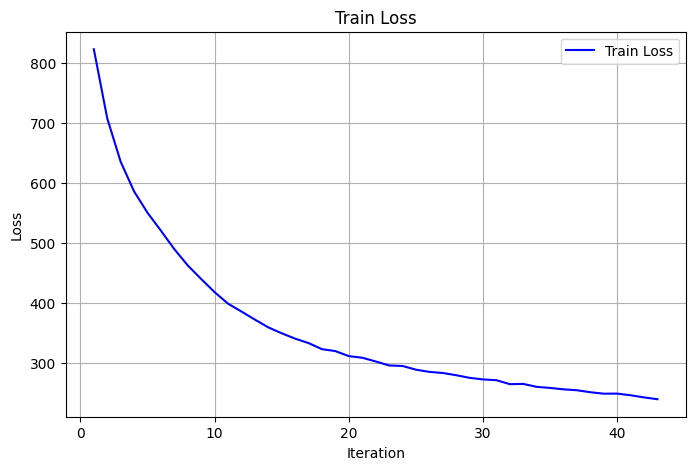

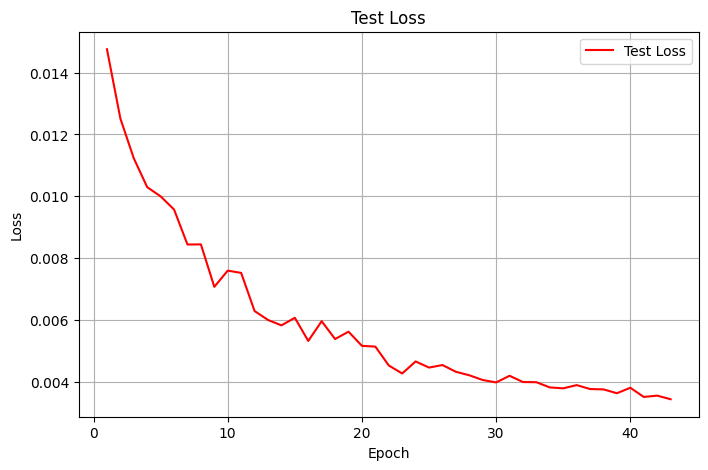

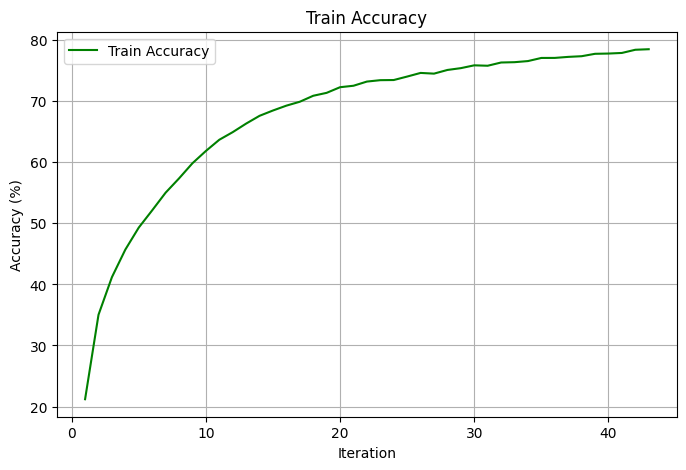

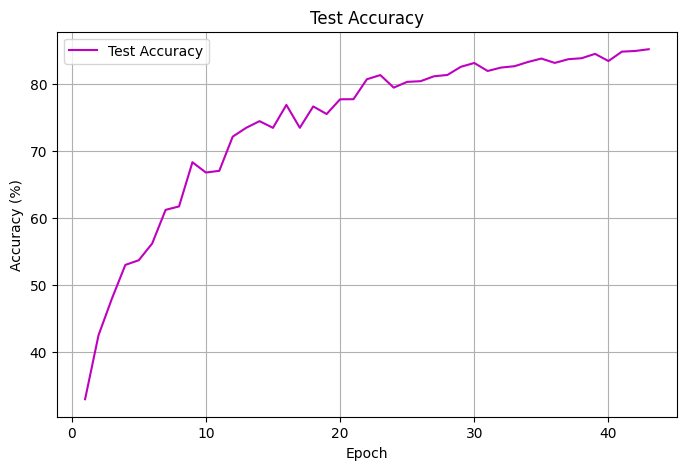

In [39]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms
from tqdm import tqdm
from torchsummary import summary
from torch.optim.lr_scheduler import StepLR
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.optim.lr_scheduler import OneCycleLR
# from models import Model1
# from utils import plot_metrics


def train(model, device, train_loader, optimizer, scheduler, criterion, epoch, train_losses, train_acc):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    train_loss = 0
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        y_pred = model(data)
        loss = criterion(y_pred, target)   # expects log_softmax in model forward
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()
        # if batch_idx > 5:
        #     break
        pred = y_pred.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        acc = 100. * correct / processed
        pbar.set_description(desc=f'Epoch={epoch} Loss={loss.item():.4f} Accuracy={acc:0.2f}')
        #train_acc.append(acc)
    train_losses.append(train_loss)
    acc = 100. * correct / len(train_loader.dataset)
    train_acc.append(acc)


def test(model, device, test_loader, criterion, test_losses, test_acc):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    acc = 100. * correct / len(test_loader.dataset)
    test_losses.append(test_loss)
    test_acc.append(acc)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({acc:.2f}%)\n')
    return acc

def get_data_loaders():
    # CIFAR-10 mean and std
    CIFAR10_MEAN = (0.4914, 0.4822, 0.4465)
    CIFAR10_STD  = (0.2470, 0.2435, 0.2616)


    fill_value_pixels = tuple(int(m * 255) for m in CIFAR10_MEAN)

    train_alb = A.Compose([
        A.HorizontalFlip(p=0.5),
         A.Affine(
            translate_percent={"x": 0.0625, "y": 0.0625},  # shift
            scale=(0.9, 1.1),                               # scale
            rotate=(-15, 15),                               # rotation
            p=0.5
        ),
        A.CoarseDropout(
            num_holes_range=(1, 1),
            hole_height_range=(16, 16),
            hole_width_range=(16, 16),
            fill=fill_value_pixels,
            fill_mask=None,
            p=0.5
        ),
        A.Normalize(mean=CIFAR10_MEAN, std=CIFAR10_STD),
        ToTensorV2(),
    ])

    val_alb = A.Compose([
        A.Normalize(mean=CIFAR10_MEAN, std=CIFAR10_STD),
        ToTensorV2(),
    ])

    class AlbCIFAR10(datasets.CIFAR10):
        def __init__(self, root, train=True, transform=None, download=False):
            super().__init__(root=root, train=train, download=download)
            self.alb_transform = transform

        def __getitem__(self, index):
            img, target = self.data[index], int(self.targets[index])
            # img is HxWxC numpy (uint8)
            if self.alb_transform:
                augmented = self.alb_transform(image=img)
                img = augmented["image"]
            else:
                # fallback: convert to tensor and normalize
                img = transforms.ToTensor()(img)
            return img, target



    # train_transforms = transforms.Compose([
    #     transforms.RandomHorizontalFlip(),
    #     transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    #     transforms.ToTensor(),
    #     transforms.Normalize(mean, std)
    # ])

    # test_transforms = transforms.Compose([
    #     transforms.ToTensor(),
    #     transforms.Normalize(mean, std)
    # ])

    # train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
    # test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

    train = AlbCIFAR10(root='./data', train=True, transform=train_alb, download=True)
    test   = AlbCIFAR10(root='./data', train=False, transform=val_alb, download=True)

    SEED = 1
    cuda = torch.cuda.is_available()
    print("CUDA Available?", cuda)
    torch.manual_seed(SEED)
    if cuda:
        torch.cuda.manual_seed(SEED)

    dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda \
                      else dict(shuffle=True, batch_size=64)
    train_loader = torch.utils.data.DataLoader(train, **dataloader_args)
    test_loader = torch.utils.data.DataLoader(test, **dataloader_args)
    return train_loader, test_loader, cuda

def perform_training():
    train_loader, test_loader, use_cuda = get_data_loaders()
    device = torch.device("cuda" if use_cuda else "cpu")
    print("Using device:", device)

    number_of_classes = 10
    model = Model1(number_of_classes).to(device)
    summary(model, input_size=(3, 32, 32))  # CIFAR-10 input size

    # return
    #optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
    # optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

    # scheduler = StepLR(optimizer, step_size=20, gamma=0.1)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    EPOCHS = 80
    scheduler = OneCycleLR(
        optimizer,
        max_lr=1e-3,
        steps_per_epoch=len(train_loader),

        epochs=EPOCHS,
        pct_start=0.2,
        anneal_strategy="cos",
    )

    EPOCHS = 100
    SAVE_PATH = "best_model.pth"

    train_losses, test_losses, train_acc, test_acc = [], [], [], []
    best_val_acc = 0.0

    for epoch in range(1, EPOCHS + 1):
        print(f"\nEPOCH: {epoch}")
        train(model, device, train_loader, optimizer, scheduler, criterion, epoch, train_losses, train_acc)
        current_test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)
        if current_test_acc >= best_val_acc:
            print("found perfect model!!")
            best_val_acc = current_test_acc
            torch.save({
                "epoch": epoch,
                "model_state": model.state_dict(),
                "optimizer_state": optimizer.state_dict(),
                "val_acc": current_test_acc,
            }, SAVE_PATH)
            print(f"Saved best model (acc={best_val_acc:.2f}%) to {SAVE_PATH}")
            if best_val_acc >= 85.0:
                break

    print("-----------------------------------------")
    print("train accuracies", len(train_acc), train_acc)
    print("train losses", len(train_losses), train_losses)
    print("-----------------------------------------")
    print("-----------------------------------------")
    print("test accuracies", len(test_acc), test_acc)
    print("test losses", len(test_losses), test_losses)
    print("-----------------------------------------")
    plot_metrics(train_losses, test_losses, train_acc, test_acc)

if __name__ == '__main__':
    perform_training()